In [1]:
import sys
sys.path.append("../..")
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import linear_model
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
from scipy.stats import boxcox, ttest_ind
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as multi
# from modeldb.sklearn_native import CrossValidationScore
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from coh_tools import *
%matplotlib inline

In [2]:
import matplotlib.style as style

In [3]:
style.available

['seaborn-paper',
 'Solarize_Light2',
 'seaborn-whitegrid',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'tableau-colorblind10',
 'seaborn-talk',
 'seaborn-poster',
 'grayscale',
 'bmh',
 'dark_background',
 'fast',
 'seaborn-ticks',
 'seaborn-muted',
 'classic',
 'ggplot',
 'seaborn-dark',
 'seaborn']

In [4]:
# style.use("seaborn-white")
style.use('tableau-colorblind10')

In [5]:
# Get experiment info
os.chdir("/home/julien/school/lab/opto_data_analysis/csvs")
# os.chdir(r"C:\Users\julienb\lab\oe_data_analysis\csvs")
experiments = pd.read_csv('table_of_experiments.csv')
experiments['keyname'] = experiments['File Name'].str[:-4]

In [6]:
experiments

Experiment   Monkey  YYYYMMDD   Session PREAMP  \
0    Experiment1  MonkeyG  20150908  Session2     M1   
1    Experiment2  MonkeyG  20150908  Session3     M1   
2    Experiment3  MonkeyG  20150908  Session4     M1   
3    Experiment4  MonkeyG  20150909  Session2     M1   
4    Experiment5  MonkeyG  20150909  Session3     M1   
..           ...      ...       ...       ...    ...   
64  Experiment65  MonkeyJ  20160627  Session2     S1   
65  Experiment66  MonkeyJ  20160630  Session1     S1   
66  Experiment67  MonkeyJ  20160630  Session3     S1   
67  Experiment68  MonkeyJ  20160702  Session2     S1   
68  Experiment69  MonkeyJ  20160702  Session4     S1   

                           File Name  stim_Coh_from  stim_Coh_to  \
0   MonkeyG_20150908_Session2_M1.zip             46           63   
1   MonkeyG_20150908_Session3_M1.zip             48           43   
2   MonkeyG_20150908_Session4_M1.zip             48           16   
3   MonkeyG_20150909_Session2_M1.zip             48           12   
4   MonkeyG_20150909_Session3_M1.zip             53           27   
..                               ...            ...          ...   
64  MonkeyJ_20160627_Session2_S1.zip             39           14   
65  MonkeyJ_20160630_Session1_S1.zip             62           55   
66  MonkeyJ_20160630_Session3_S1.zip             58           63   
67  MonkeyJ_20160702_Session2_S1.zip             50           37   
68  MonkeyJ_20160702_Session4_S1.zip             44           64   

    Number of Lasers in Experiment  Number of Lasers during Conditioning  \
0                                2                                     2   
1                                2                                     2   
2                                2                                     2   
3                                2                                     2   
4                                2                                     2   
..                             ...                                   ...   
64                               2                                     2   
65                               2                                     2   
66                               2                                     2   
67                               2                                     2   
68                               2                                     2   

    Delay                       keyname   one   two  doubles  singles  
0    10ms  MonkeyG_20150908_Session2_M1  True  True     True    False  
1    10ms  MonkeyG_20150908_Session3_M1  True  True     True    False  
2    10ms  MonkeyG_20150908_Session4_M1  True  True     True    False  
3    10ms  MonkeyG_20150909_Session2_M1  True  True     True    False  
4    10ms  MonkeyG_20150909_Session3_M1  True  True     True    False  
..    ...                           ...   ...   ...      ...      ...  
64  100ms  MonkeyJ_20160627_Session2_S1  True  True     True    False  
65  100ms  MonkeyJ_20160630_Session1_S1  True  True     True    False  
66   10ms  MonkeyJ_20160630_Session3_S1  True  True     True    False  
67   10ms  MonkeyJ_20160702_Session2_S1  True  True     True    False  
68  100ms  MonkeyJ_20160702_Session4_S1  True  True     True    False  

[69 rows x 16 columns]

In [7]:
multiband_paired_dict = pkl.load(open("/mnt/hdd2tb/lab/elife/data/pickled/20sec_allsession_pcoh/allsites_band_data.pkl", "rb"))
# multiband_paired_dict = pkl.load(open(r"C:\Users\julienb\lab\oe_data_analysis\pickled\multiband_timefreq_paired_dict.pkl", "rb"))
# multiband_allcon_dict = pkl.load(open("/mnt/hdd2tb/lab/elife/data/pickled/multiband_timefreq_allcon_dict.pkl", "rb"))


In [11]:
multiband_paired_dict["beta"]["MonkeyG_20150908_Session2_M1_RecBlock1"].shape

(1, 67, 67)

In [16]:
good_channels = pkl.load(open("/home/julien/school/lab/opto_data_analysis/pickled/good_channels.pkl", "rb"))


In [27]:
multiband_paired_dict["theta"]

{'MonkeyG_20150908_Session2_M1_RecBlock1': array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]),
 'MonkeyG_20150908_Session2_M1_RecBlock2': array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]),
 'MonkeyG_20150908_Session2_M1_CondBlock1': array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan

for tau = 10
0.005306405265812386
for tau = 10
0.0024665194396282786
for tau = 10
0.0173911147399598


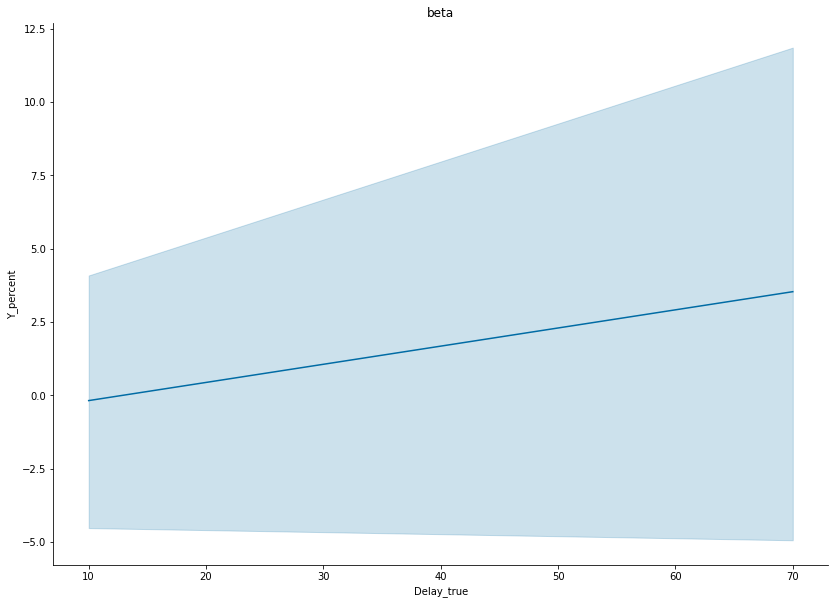

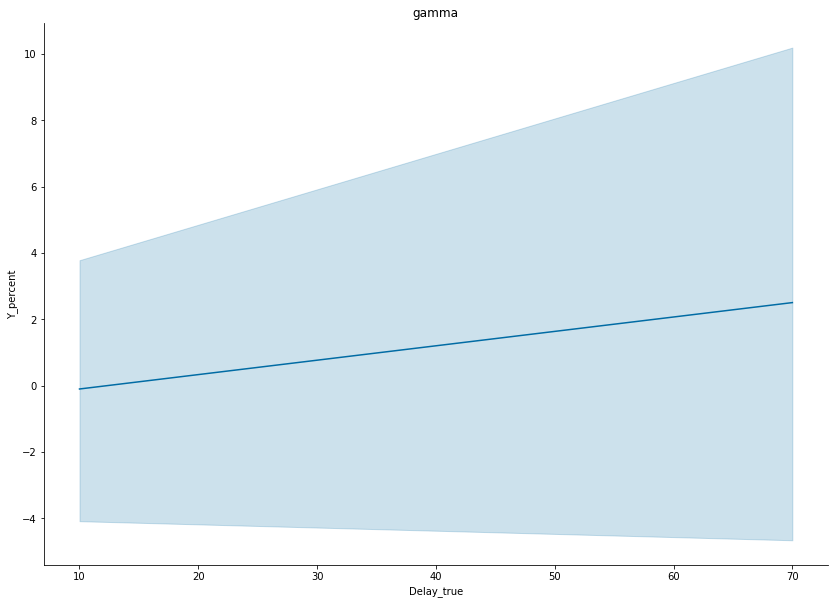

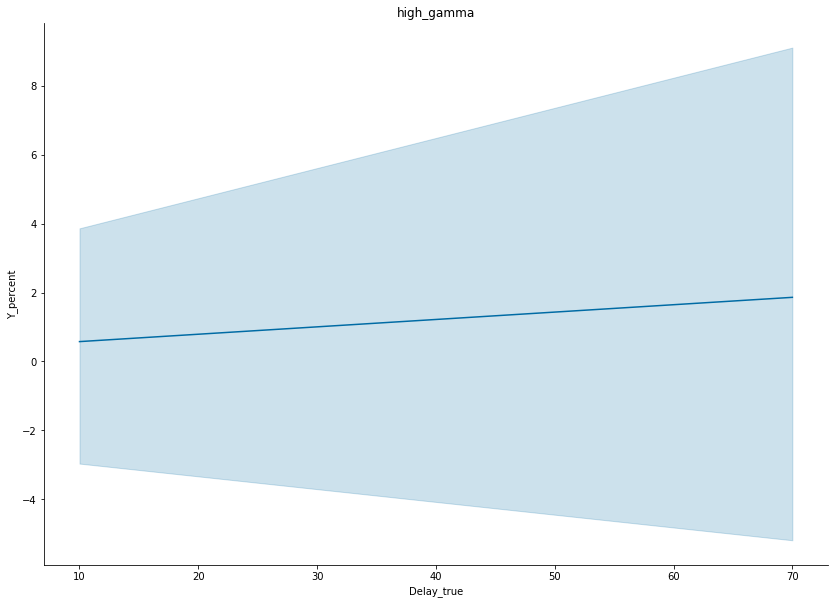

In [30]:
## Generate plots ##
for band in ["beta", "gamma", "high_gamma"]:
    paired_dict = multiband_paired_dict[band]

    basemeans = []
    newbasemeans = []
    delays = []
    deltacohs = []
    exp_list = []

    # Iterate through experiments
    for index, row in experiments.iterrows():
        key = row["keyname"]
        exp_list.append(key[:25])
    

        try:
            row["Delay"][:-2]
            good_from = good_channels[key[:-3]].index(row["stim_Coh_from"])
            good_to = good_channels[key[:-3]].index(row["stim_Coh_to"])
            for block_num in np.arange(6)+1:
                rec_key = key+"_RecBlock"+str(block_num)
                
                if block_num < 6:
#                     print(paired_dict[rec_key].mean(0).shape)
                    basemeans.append(paired_dict[rec_key].mean(0)[good_from, good_to])
#                     print("up")
                if block_num > 1:
#                     print(paired_dict[rec_key].shape)
                    newbasemeans.append(paired_dict[rec_key].mean(0)[good_from, good_to])
                    delays.append(int(row["Delay"][:-2]))
#                     print("down")

        except Exception as e:
#             print(e)
            break
            continue
            
    Y = (np.array(newbasemeans) - np.array(basemeans)) #/ np.array(basemeans)
    Y_abs = abs(Y)
#     Y_abs = 
    data = pd.DataFrame({"Delay_true": delays, "Initial_coh": basemeans, \
                         "Y_abs": Y_abs*100, "Y": Y, "Y_percent": Y*100})    

    for tau in [10]:
        delay_curve = np.exp(-(np.array(delays))/tau)

        data["Delay_STDP"] = delay_curve

        stdp_delay = smf.ols(formula='Y_abs ~  Delay_STDP', data=data).fit()
        print("for tau = "+str(tau))
        print(stdp_delay.rsquared)
    normal_delay = smf.ols(formula='Y_abs ~  Delay_true', data=data).fit()

#     ### PLOTTING ###
    b = sns.relplot(x="Delay_true", y="Y_percent", data=data, kind="line", label="Data", ci=68, height=8.27, aspect=11.7/8.27) #, ax=axs[band_i//2, band_i%2])
    plt.title(band)


In [25]:
np.array(basemeans).shape

(55,)

In [20]:
np.array(newbasemeans).shape

(55,)

In [21]:
Y.shape

(55,)

In [49]:
ecog_map = map_to_ecog(np.arange(1, 97), want_data=True, csv_dir = "/home/julien/school/lab/oe_data_analysis/csvs/")
# ecog_map = map_to_ecog(np.arange(1, 97), want_data=True, csv_dir = r"C:\Users\julienb\lab\oe_data_analysis\csvs/")

def get_distance(electrode_a, electrode_b): # Indexing is 1 - 96
    if min(electrode_a, electrode_b) <= 0:
#         print("Electrode indexing starts from 1")
#         return
        return 0
    return ((ecog_map[0][electrode_a-1]  - ecog_map[0][electrode_b-1])**2 + (ecog_map[1][electrode_a-1]  - ecog_map[1][electrode_b-1])**2)**.5


In [45]:
len(distances)

0

In [68]:
import linecache
import sys

def PrintException():
    exc_type, exc_obj, tb = sys.exc_info()
    f = tb.tb_frame
    lineno = tb.tb_lineno
    filename = f.f_code.co_filename
    linecache.checkcache(filename)
    line = linecache.getline(filename, lineno, f.f_globals)
    print('EXCEPTION IN ({}, LINE {} "{}"): {}'.format(filename, lineno, line.strip(), exc_obj))


# try:
#     print 1/0
# except:
#     PrintException()

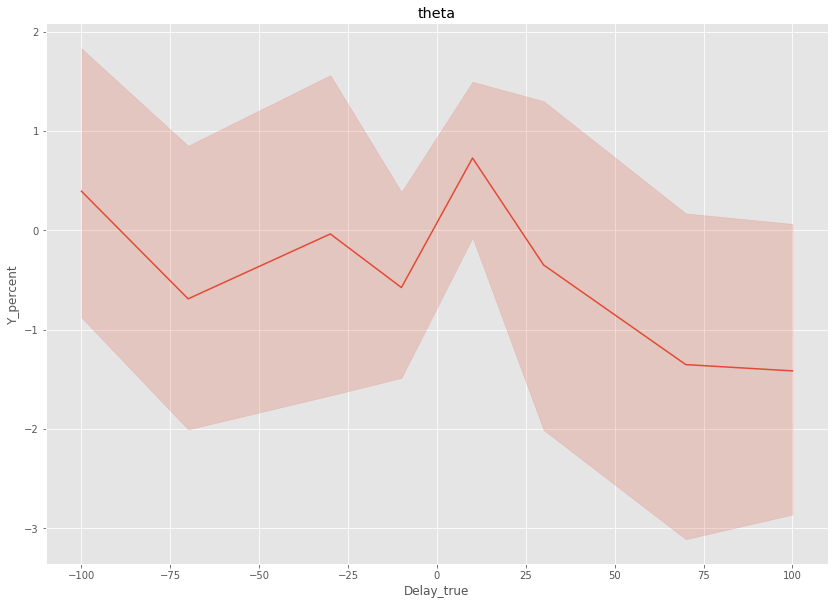

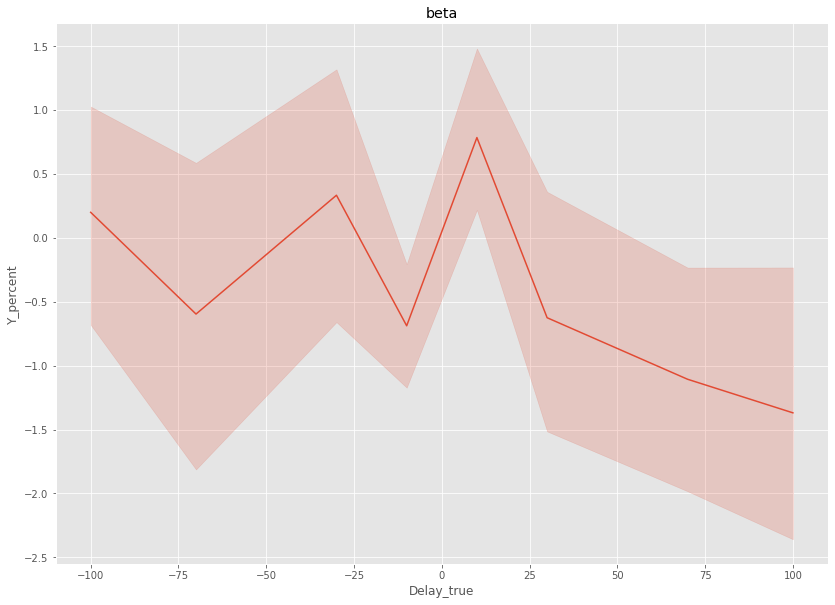

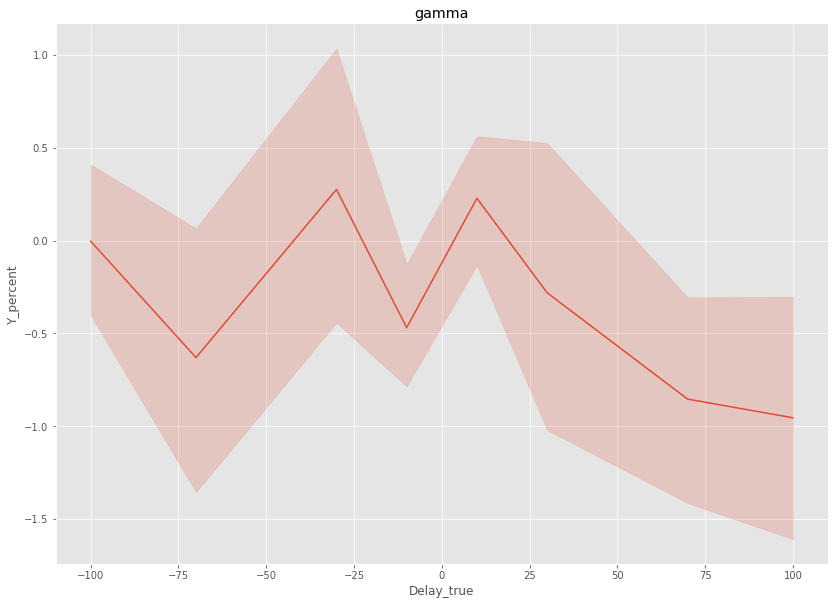

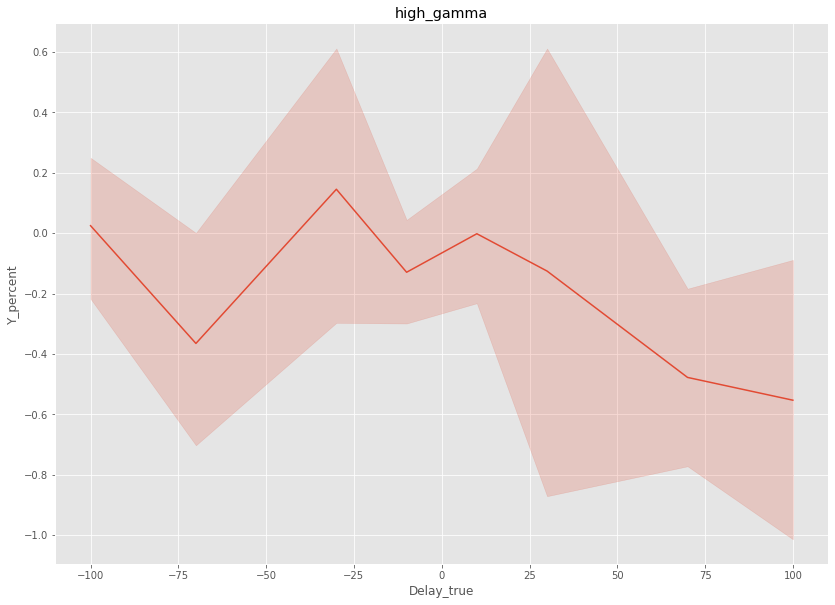

In [82]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    paired_dict = multiband_paired_dict[band]

    basemeans = []
    newbasemeans = []
    delays = []
    deltacohs = []
    exp_list = []
    distances = []
    directions = []

    # Iterate through experiments
    for index, row in experiments.iterrows():
        key = row["keyname"]
        exp_list.append(key[:25])
    

        try:
            row["Delay"][:-2]
            good_from = good_channels[key[:-3]].index(row["stim_Coh_from"])
            good_to = good_channels[key[:-3]].index(row["stim_Coh_to"])
            for block_num in np.arange(6)+1:
                rec_key = key+"_RecBlock"+str(block_num)
                
                if block_num < 6:
#                     print(paired_dict[rec_key].mean(0).shape)
                    basemeans.append(paired_dict[rec_key].mean(0)[good_from, good_to])
                    basemeans.append(paired_dict[rec_key].mean(0)[good_to, good_from])
#                     print("up")
                if block_num > 1:
#                     print(paired_dict[rec_key].shape)
                    newbasemeans.append(paired_dict[rec_key].mean(0)[good_from, good_to])
                    directions.append("xy")
                    newbasemeans.append(paired_dict[rec_key].mean(0)[good_to, good_from])
                    directions.append("yx")
                    delays.append(int(row["Delay"][:-2]))
                    delays.append(-int(row["Delay"][:-2]))
                    distances.append(get_distance(good_from, good_to))
                    distances.append(get_distance(good_from, good_to))
#                     print("down")

        except Exception as e:
#             PrintException()
            continue

    Y = (np.array(newbasemeans) - np.array(basemeans)) #/ np.array(basemeans)
    Y_abs = abs(Y)
#     Y_abs = 
    data = pd.DataFrame({"Delay_true": delays, "Initial_coh": basemeans, "Direction": directions, \
                         "Distance": distances, "Y_abs": Y_abs*100, "Y": Y, "Y_percent": Y*100})    

    
#         scaler = StandardScaler()
#         data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
#         data_scaled["Y"] = Y

#         print("for linear:")
#         print(normal_delay.rsquared)

    for tau in [10]:
        delay_curve = np.exp(-(np.array(delays))/tau)

        data["Delay_STDP"] = delay_curve

#             scaler = StandardScaler()
#             data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
#             data_scaled["Y"] = Y

        stdp_delay = smf.ols(formula='Y_abs ~  Delay_STDP', data=data).fit()
#             print("for tau = "+str(tau))
#             print(stdp_delay.rsquared)
    normal_delay = smf.ols(formula='Y_abs ~  Delay_true', data=data).fit()

#     ### PLOTTING ###
    b = sns.relplot(x="Delay_true", y="Y_percent", data=data, kind="line", label="Data", ci=68, height=8.27, aspect=11.7/8.27) #, ax=axs[band_i//2, band_i%2])
    plt.title(band)

In [74]:
for l in [delays, basemeans, directions, distances]:
    print(len(l))

265
530
530
265


In [80]:
style.use("ggplot")